# Flight Data

In [9]:
install.packages("data.table", dependencies=TRUE)
install.packages("DataExplorer", dependencies=TRUE)

library(data.table)
library(DataExplorer)

also installing the dependencies ‘RcppCCTZ’, ‘xts’, ‘nanotime’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘xfun’, ‘tinytex’, ‘igraph’, ‘praise’, ‘rex’, ‘gridExtra’, ‘rmarkdown’, ‘networkD3’, ‘testthat’, ‘covr’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### Visualizando dataset completo: 

In [ ]:
#long download time =/
load(url("http://eic.cefet-rj.br/~eogasawara/data/anac/vra-wu.RData"))
head(vra_wu)

### Visualizando dataset reduzido: 

In [93]:
load("vra-wu-small.RData")
head(vra_wu)

,destiny,arrival_expect_date,arrival_expect_hour,origin,depart_expect_date,depart_expect_hour,airline,flight,autho_code,line_type,⋯,depart_visibility,depart_events,depart_conditions,arrival_temperature,arrival_dew_point,arrival_humidity,arrival_pressure,arrival_visibility,arrival_events,arrival_conditions
20098,KJFK,2017-01-02,05:00,SAEZ,2017-01-01,23:00,ARG,1300,0,I,⋯,NA,NA,Clear,3.3,0.0,5.0,55,1032.2,13.0 km/h / 3.6 m/s,<c2>
20099,KJFK,2017-01-02,08:00,SBGR,2017-01-01,22:00,DAL,472,0,I,⋯,NA,NA,Clear,4.4,1.4,0.6,70,1032.5,13.0 km/h / 3.6 m/s,Rain
20100,KJFK,2017-01-02,09:00,SBGR,2017-01-01,22:00,TAM,8080,0,I,⋯,NA,NA,Clear,5.0,1.8,0.6,73,1033.2,14.8 km/h / 4.1 m/s,<c2>
20101,KJFK,2017-01-02,09:00,SBGR,2017-01-01,23:00,AAL,950,0,I,⋯,NA,NA,Clear,5.0,1.8,0.6,73,1033.2,14.8 km/h / 4.1 m/s,<c2>
20102,KJFK,2017-01-02,09:00,SBGL,2017-01-01,23:00,AAL,974,0,I,⋯,10,Thunderstorm,Partly Cloudy,5.0,1.8,0.6,73,1033.2,14.8 km/h / 4.1 m/s,<c2>
20103,KJFK,2017-01-02,09:00,SBGR,2017-01-01,23:00,TAM,8102,0,I,⋯,NA,NA,Clear,5.0,1.8,0.6,73,1033.2,14.8 km/h / 4.1 m/s,<c2>


### Data Explorer

In [55]:
introduce(vra_wu)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,total_observations,memory_usage
1268598,37,22,15,0,17186249,46938126,571875352


#### Dados ausentes por característica:

Aqui é possivel ver a porcentagem dos dados ausêntes em cada tipo de informação

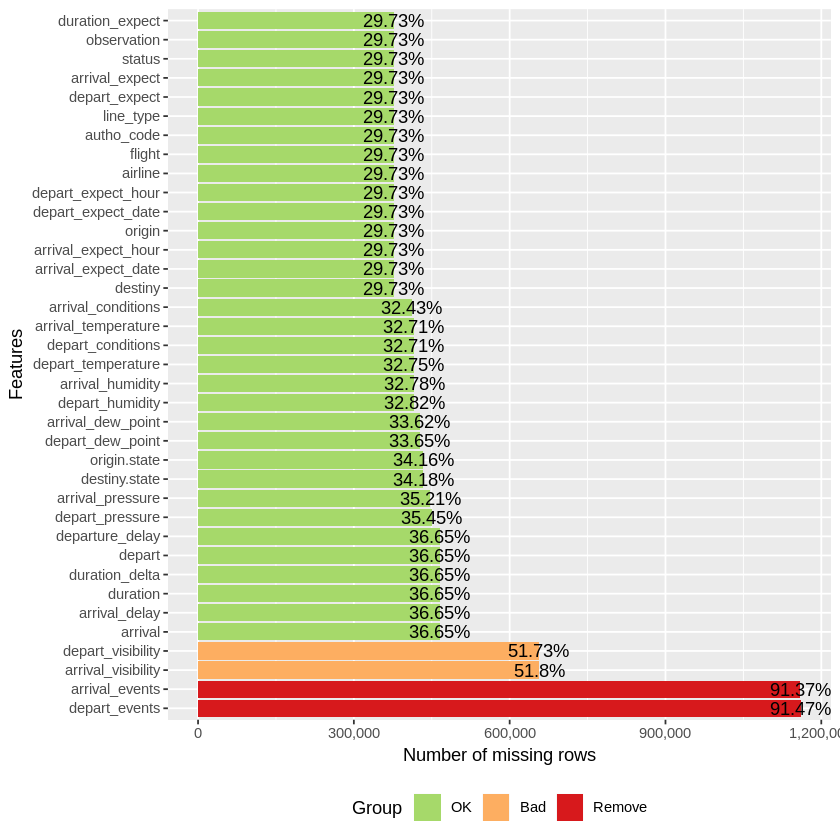

In [58]:
plot_missing(vra_wu)

#### Limpando os dados:

Removendo os dados NA's e filtrando pelos atrasos somente de 15min até 4 horas, considerando os top 10 aeroportos.

In [99]:
#data cleaning
vra_wu <- na.omit(vra_wu)
vra_wu <- vra_wu[vra_wu$arrival>vra_wu$depart,]
vra_wu <- vra_wu[vra_wu$arrival_expect>vra_wu$depart_expect,]
vw <- vra_wu[vra_wu$departure_delay >15 & vra_wu$departure_delay <240,]
vw_t10 <- vw[vw$origin == 'SBGR' | vw$origin == 'SBSP' | vw$origin == 'SBSG'
            | vw$origin == 'SBKP' | vw$origin == 'SBCT' | vw$origin == 'SBBR'
            | vw$origin == 'SBRJ' | vw$origin == 'SBBE' | vw$origin == 'SBRF' | vw$origin == 'SBGL',]

#### Distribuições:

Visualizando a distribuição de frequencias para todas as características discretas:

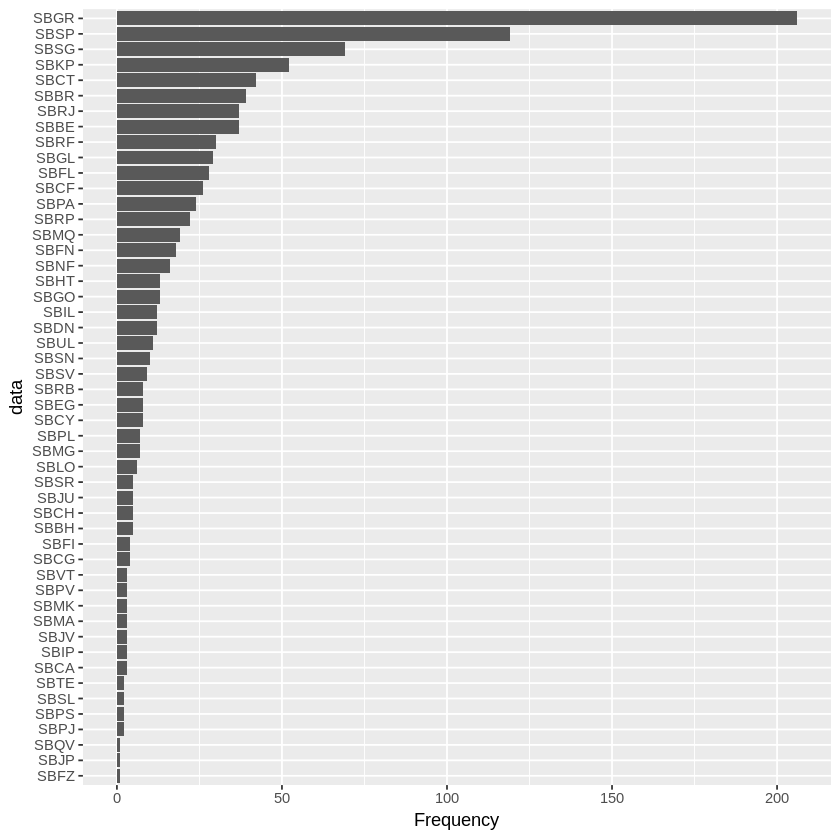

In [97]:
plot_bar(vra_wu$origin)

7 columns ignored with more than 50 categories.
arrival_expect_date: 192 categories
depart_expect_date: 184 categories
flight: 378 categories
depart_expect: 640 categories
depart: 651 categories
arrival_expect: 650 categories
arrival: 658 categories



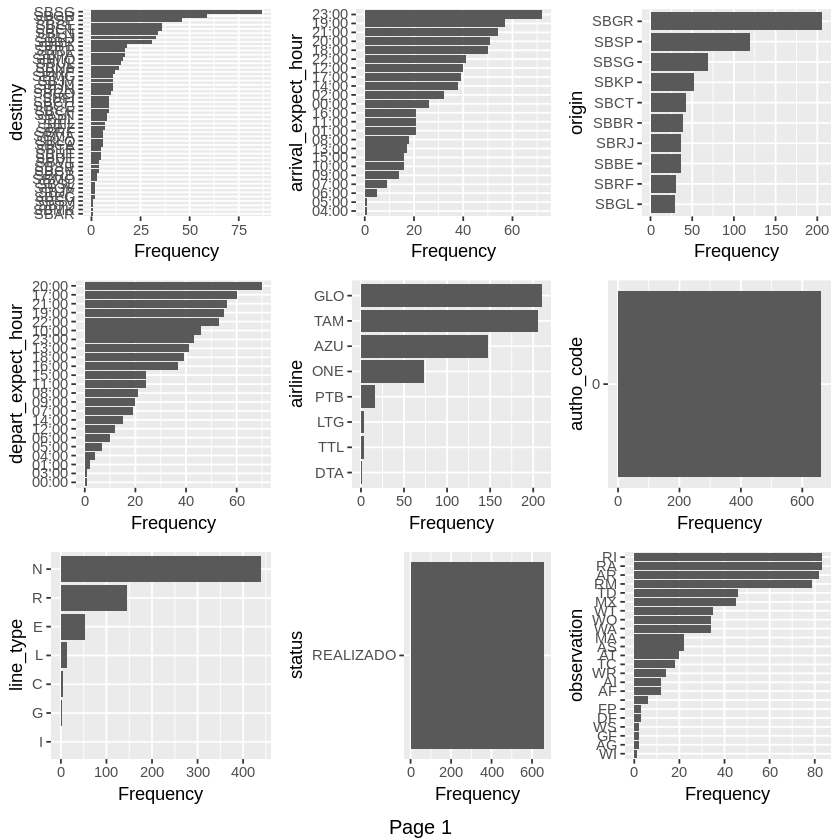

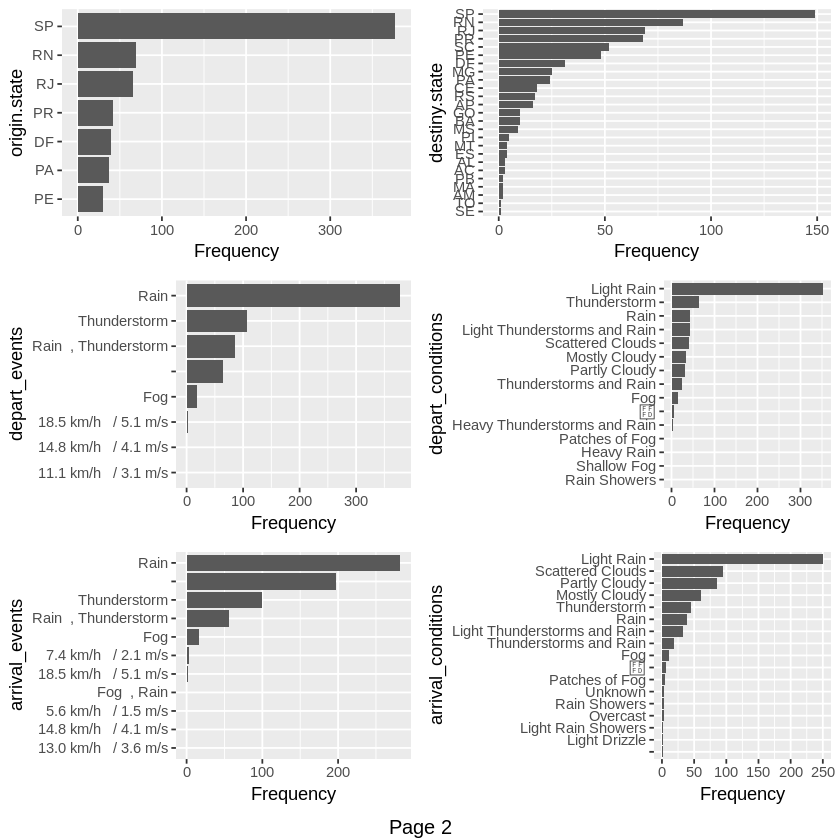

In [100]:
plot_bar(vw_t10)

#### Histograma:

Visualizando distribuições para as características contínuas:

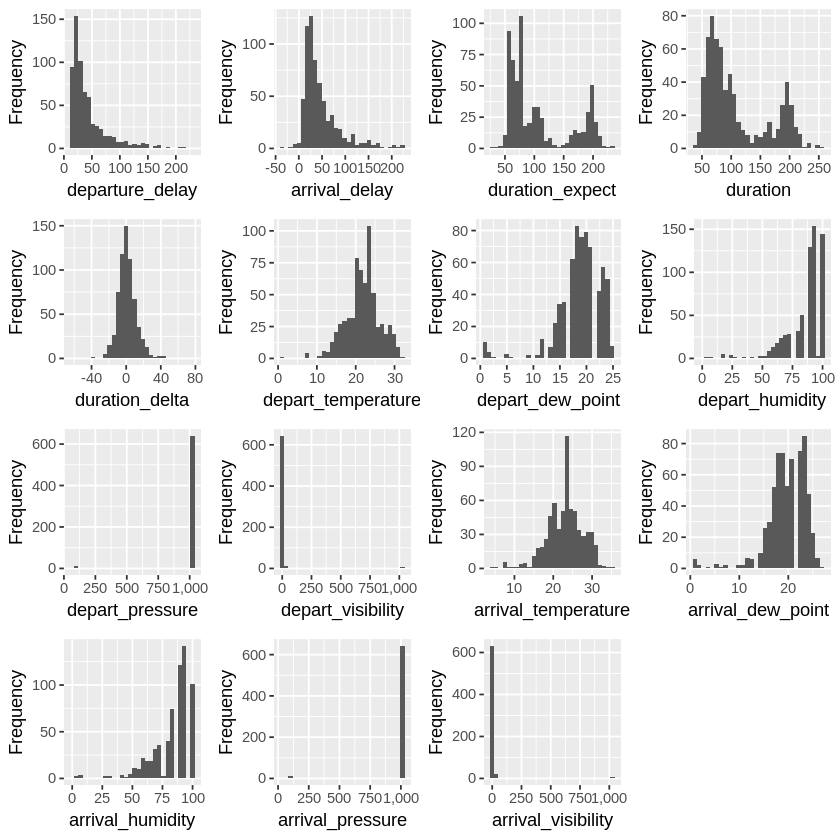

In [102]:
plot_histogram(vw_t10)

#### Análise de correlação:

Visualizando o mapa de calor da análise de correlação das características

20 features with more than 5 categories ignored!
destiny: 48 categories
arrival_expect_date: 192 categories
arrival_expect_hour: 23 categories
origin: 10 categories
depart_expect_date: 184 categories
depart_expect_hour: 23 categories
airline: 8 categories
flight: 378 categories
line_type: 7 categories
depart_expect: 640 categories
depart: 651 categories
arrival_expect: 650 categories
arrival: 658 categories
observation: 23 categories
origin.state: 7 categories
destiny.state: 25 categories
depart_events: 8 categories
depart_conditions: 15 categories
arrival_events: 11 categories
arrival_conditions: 17 categories

Warning message in cor(final_data, ...):
“the standard deviation is zero”Warning message:
“Removed 64 rows containing missing values (geom_text).”

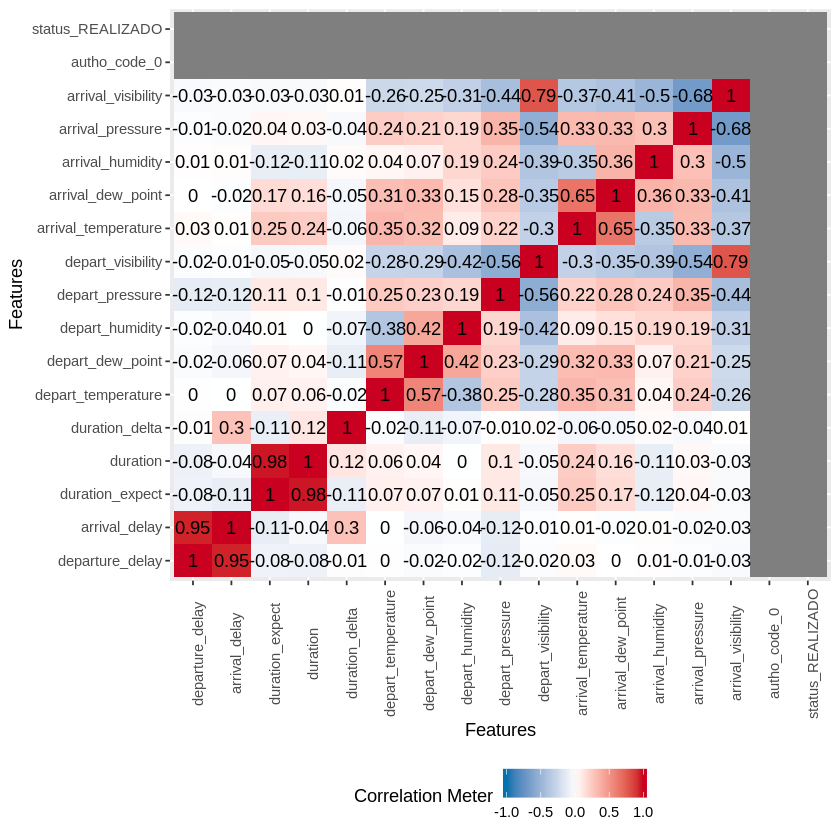

In [103]:
plot_correlation(vw_t10, maxcat = 5L, use = "pairwise.complete.obs")

# DATASET 2017


In [3]:
load("vrawu17.RData")
head(vrawu17)

codigo_tipo_linha,cod_justificativa,icao_empresa,codigo_di,icao_destino,icao_origem,timekey_partida,voo,partida_prevista,partida_real,⋯,destino_descricao,destino_cidade,destino_uf,destino_pais,destino_continente,descricao_codigo_di,empresa,nacionalidade,descricao_justificativa,tipo_linha
,XN,LTG,0,SCDA,SBEG,201708131500,8484,2017-08-13 15:20:00,NA,⋯,DIEGO ARACENA INTERNATIONAL AIRPORT,IQUIQUE,NA,CHILE,AMERICA DO SUL,Vôo Regular,ABSA,BRASILEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA
,XB,TPA,0,SBCT,KMIA,201708130900,843,2017-08-13 09:00:00,NA,⋯,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,AMERICA DO SUL,Vôo Regular,TAMPA S/A,ESTRANGEIRA,AUTORIZADO,NA
,NA,LTG,0,SVMI,SBEG,201708132100,8472,2017-08-13 21:42:00,2017-08-13 23:46:00,⋯,SIMON BOLIVAR INTERNATIONAL AIRPORT (MAIQUETIA INTERNATIONAL AIRPORT),CARACAS/INTL,NA,VENEZUELA,AMERICA DO SUL,Vôo Regular,ABSA,BRASILEIRA,NA,NA
,XN,LCO,0,SBKP,SBEG,201708140100,1509,2017-08-14 01:25:00,NA,⋯,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,Vôo Regular,LAN CARGO S.A,ESTRANGEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA
,XN,GLO,0,SBCT,SBPA,201708131300,1986,2017-08-13 13:02:00,NA,⋯,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA
,XN,LTG,0,SGES,SGAS,201708130800,8443,2017-08-13 08:00:00,NA,⋯,GUARANI INTERNATIONAL AIRPORT,CIDADE DEL ESTE,NA,PARAGUAI,AMERICA DO SUL,Vôo Regular,ABSA,BRASILEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA


#### Dados ausentes por característica:


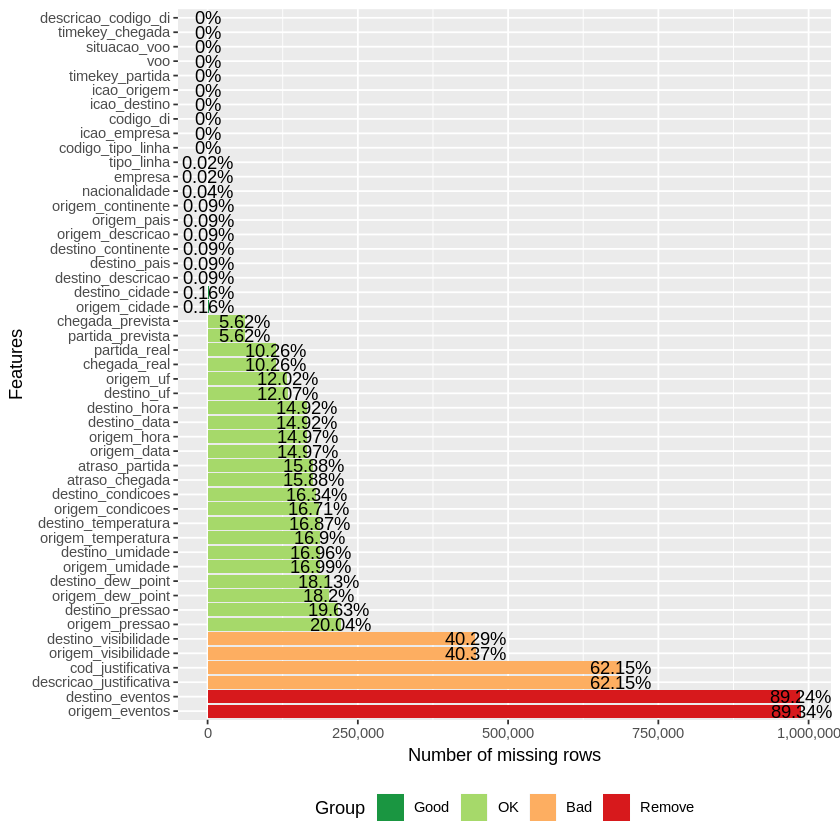

In [7]:
plot_missing(vrawu17)

### Clearing


In [4]:
vrawu17 <- na.omit(vrawu17)

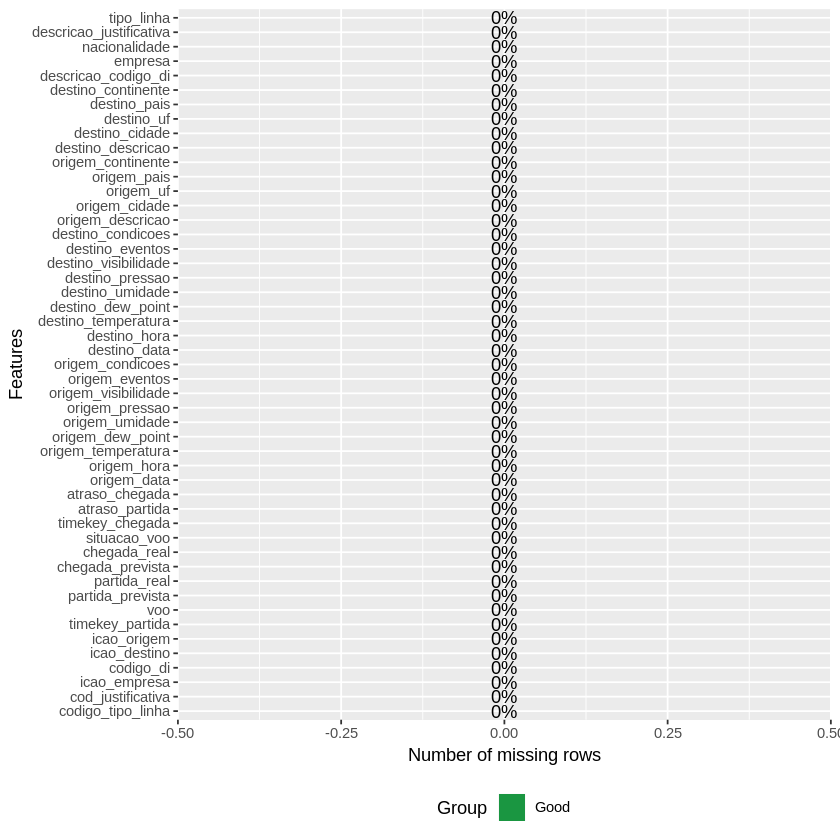

In [9]:
plot_missing(vrawu17)

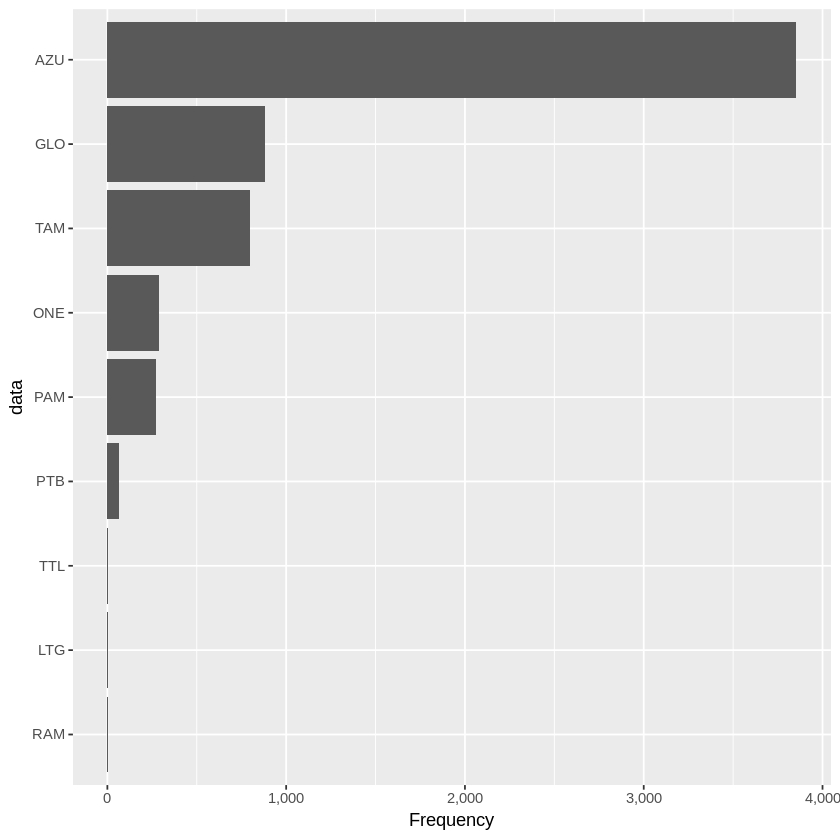

In [11]:
plot_bar(vrawu17$icao_empresa)

### Agregando alguns dados

In [5]:
fl17 <- vrawu17
'%!in%' <- function(x,y)!('%in%'(x,y))

In [6]:
fl17[which(fl17$icao_empresa %in% c("PAM", "PTB", "TTL", "LTG", "RAM", "ONE")),]$icao_empresa <- "OUTRAS"
fl17[which(fl17$icao_origem %!in% c(head(fl17$icao_origem, n=30))),]$icao_origem <- "OUTRAS"
fl17[which(fl17$destino_uf %!in% c(head(fl17$destino_uf, n=30))),]$destino_uf <- "OUTROS"
fl17[which(fl17$icao_destino %!in% c(head(fl17$icao_destino, n=30))),]$icao_destino <- "OUTROS"
fl17[which(fl17$destino_cidade %!in% c(head(fl17$destino_cidade, n=30))),]$destino_cidade <- "OUTROS"
fl17[which(fl17$destino_descricao %!in% c(head(fl17$destino_descricao, n=30))),]$destino_descricao <- "OUTROS"

#Convertendo datas
fl17$timekey_partida <- strptime(fl17$timekey_partida, '%Y%m%d%H%M')
fl17$timekey_chegada <- strptime(fl17$timekey_chegada, '%Y%m%d%H%M')
fl17$origem_data <- as.Date(fl17$origem_data)
fl17$destino_data <- as.Date(fl17$destino_data)


In [7]:
#Filtrando atrasos com mais de 10 min (partida e chegada)
fl17 <- fl17[fl17$atraso_partida > 10 & fl17$atraso_partida > 10,]

In [10]:
introduce(fl17)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,total_observations,memory_usage
2427,49,38,11,0,0,118923,67158448


10 columns ignored with more than 50 categories.
timekey_partida: 1594 categories
partida_prevista: 2323 categories
partida_real: 2396 categories
chegada_prevista: 2344 categories
chegada_real: 2403 categories
timekey_chegada: 1679 categories
atraso_partida: 187 categories
atraso_chegada: 209 categories
origem_data: 357 categories
destino_data: 359 categories



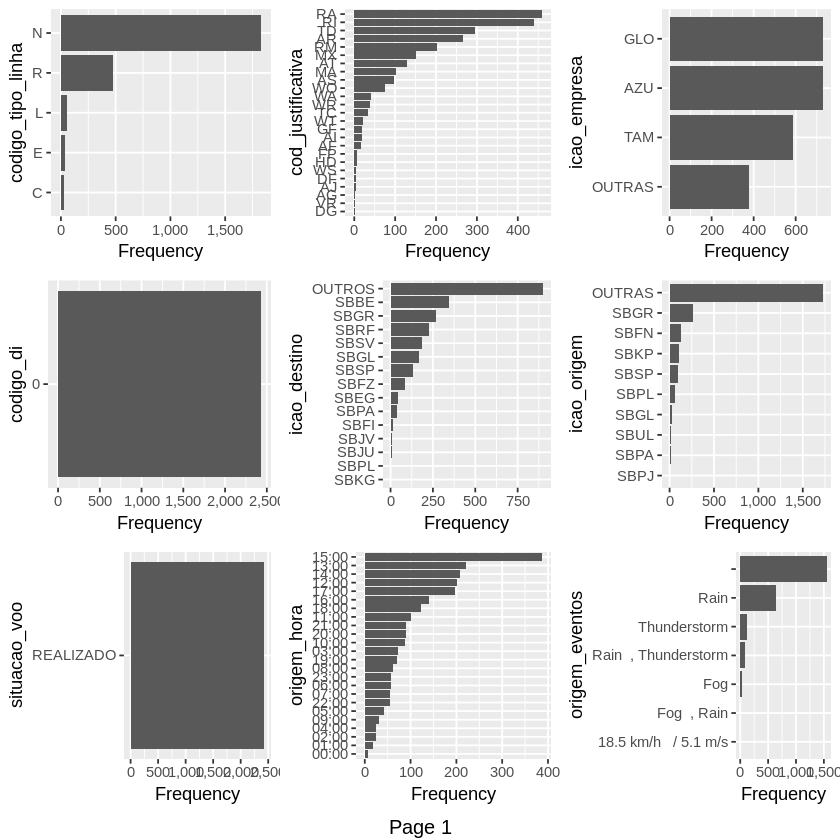

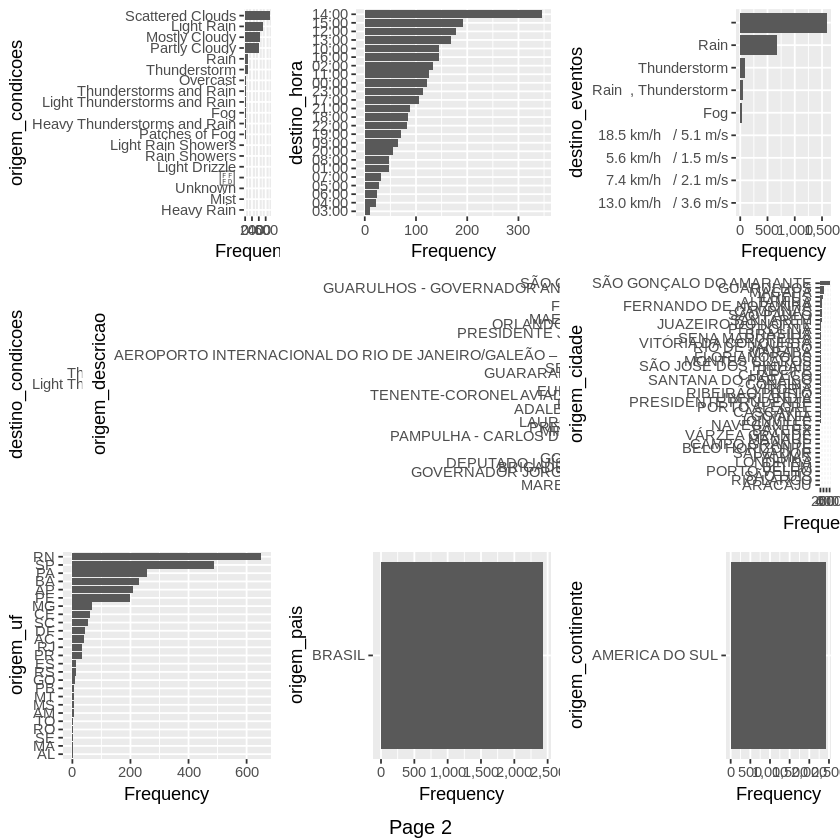

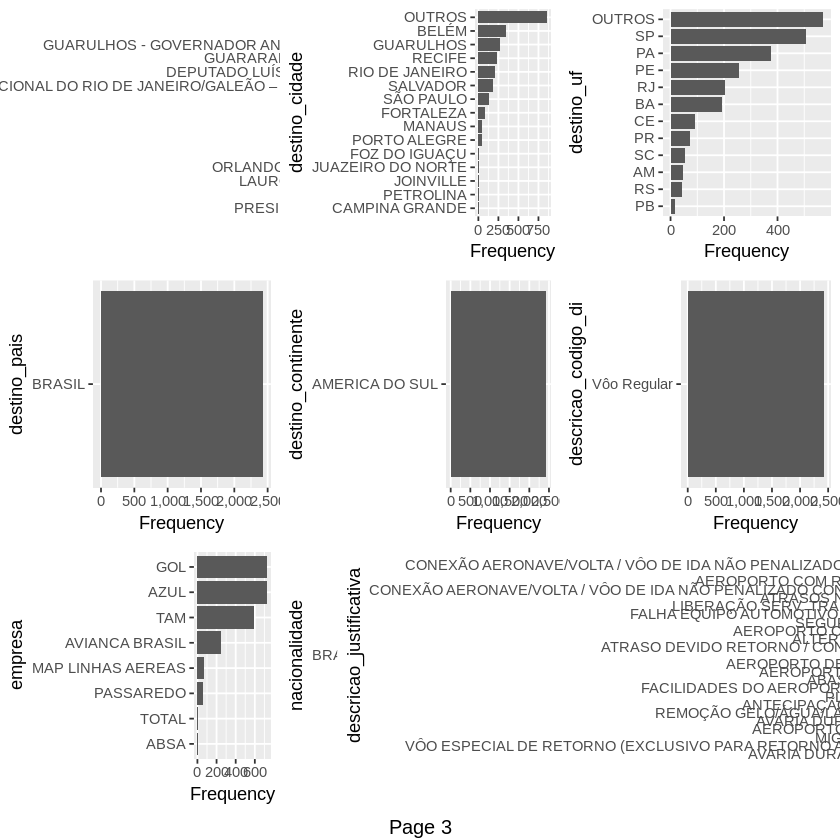

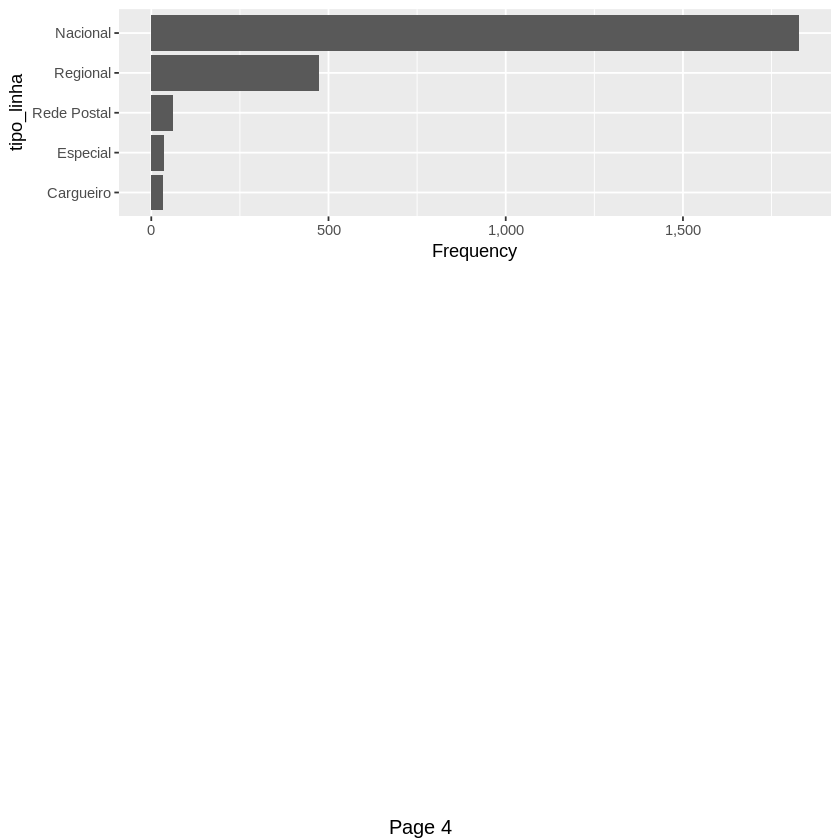

In [13]:
plot_bar(fl17)

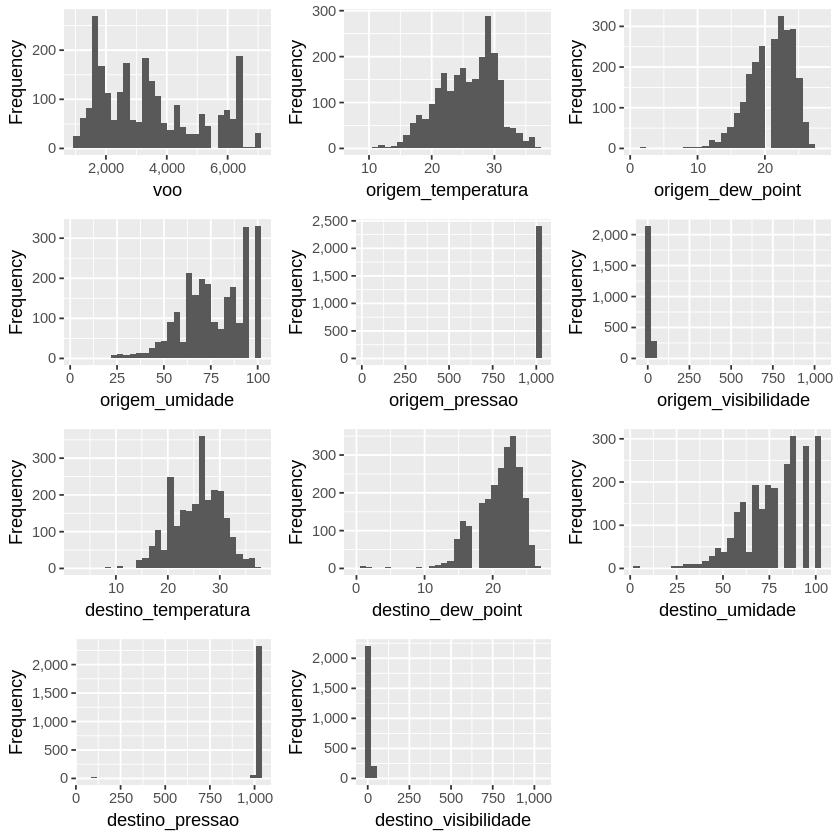

In [12]:
plot_histogram(fl17)

In [18]:
#plot_bar(fl17)
#plot_str(fl17)
#head(fl17$origem_data, n=20)
#head(format(strptime(fl17$timekey_partida, '%Y%m%d%H%M'), '%H:%M %d/%m/%Y'), n=20)

#PCA
plot_prcomp(fl17) 

10 features with more than 50 categories ignored!
timekey_partida: 1594 categories
partida_prevista: 2323 categories
partida_real: 2396 categories
chegada_prevista: 2344 categories
chegada_real: 2403 categories
timekey_chegada: 1679 categories
atraso_partida: 187 categories
atraso_chegada: 209 categories
origem_data: 357 categories
destino_data: 359 categories



ERROR: Error in make.names(paste0(x, "_", get(x))): invalid multibyte string 779


In [17]:
plot_correlation(fl17, maxcat = 50L, use = "pairwise.complete.obs")

10 features with more than 50 categories ignored!
timekey_partida: 1594 categories
partida_prevista: 2323 categories
partida_real: 2396 categories
chegada_prevista: 2344 categories
chegada_real: 2403 categories
timekey_chegada: 1679 categories
atraso_partida: 187 categories
atraso_chegada: 209 categories
origem_data: 357 categories
destino_data: 359 categories



ERROR: Error in make.names(paste0(x, "_", get(x))): invalid multibyte string 779
